# ***Libraries & Constants***

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.model_selection import train_test_split

In [ ]:
!gdown --id 1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u
To: /content/Dataset.csv
100% 38.0k/38.0k [00:00<00:00, 2.62MB/s]


In [ ]:
categorical_attr = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

# ***Preprocessing***

Reading & displaying data:

In [ ]:
df = pd.read_csv('Dataset.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
print(df.shape)

(480, 17)


In [ ]:
# Converting Categorical values to scaler values
le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)


In [ ]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


In [ ]:
def class_label(row):
  if row == 1 or row == 2:
    return 1
  else:
    return 0

In [ ]:
df['Class'] = df['Class'].apply(class_label)

In [ ]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,1
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,1
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,1


In [ ]:
# X: Features, y: Classes
X = np.array(df.iloc[:, :-1])
y = np.array(df['Class'])

In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [ ]:
X

array([[1.        , 0.30769231, 0.30769231, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.30769231, 0.30769231, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.30769231, 0.30769231, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.23076923, 0.23076923, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.23076923, 0.23076923, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.23076923, 0.23076923, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# Deviding Dataset to training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
print('Number of dataset: ', len(X))
print('Number of train set: ', len(X_train))
print('Number of validation set: ', len(X_val))

Number of dataset:  480
Number of train set:  384
Number of validation set:  96


#Neural Network Class

In [ ]:
from numpy.lib import npyio
class Neural_Network:
  #x=X_train, y=y_train, h=hidden layer neurons
  def __init__(self, sizes, epochs=1000, l_rate=0.1):
    self.sizes = sizes
    self.epochs = epochs
    self.l_rate = l_rate

    self.params = self.initialization()
    self.accuracyTest = []
    self.lossTest = []
    self.accuracyTrain = []
    self.lossTrain = []

  def sigmoid(self, x, derivative=False):
        if derivative:
            return (np.exp(-x))/((np.exp(-x)+1)**2)
        return 1/(1 + np.exp(-x))

  def softmax(self, x, derivative=False):
      # Numerically stable with large exponentials
      exps = np.exp(x - x.max())
      if derivative:
          return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
      return exps / np.sum(exps, axis=0)

  def initialization(self):
        # number of nodes in each layer
        input_layer=self.sizes[0]
        hidden_1=self.sizes[1]
        output_layer=self.sizes[2]

        params = {
            'W1':np.random.randn(hidden_1, input_layer),
            'W2':np.random.randn(output_layer, hidden_1),
            'B1':np.random.randn(hidden_1,),
            'B2':np.random.randn(output_layer,),
        }
        return params
  def FeedForward(self, X_train):
    params = self.params
    params['A0'] = X_train

    #input layer to hidden layer
    params['Z1'] = np.dot(params["W1"], params['A0'].T) + params['B1']
    params['A1'] = self.sigmoid(params['Z1'])

    #hidden layer to output layer
    params['Z2'] = np.dot(params["W2"], params["A1"]) + params['B2']
    params['A2'] = self.sigmoid(params['Z2'])

    return params['A2']
  
  def BackPropagation(self, y_train, output):
    params = self.params
    change_w = {}
    
    #calculate w2 and b2 update
    error = 2 * (output - y_train) / output.shape[0] * self.sigmoid(params['Z2'], derivative=True)
    change_w['W2'] = np.outer(error, params['A1'])
    change_w['B2'] = params['B2'] + error[0]

    #calculate w1 and b1 update
    error = (np.dot(params['W2'].T, error) + params['B1']) * self.sigmoid(params['Z1'], derivative=True)
    change_w['W1'] = np.outer(error, params['A0'])
    change_w['B1'] = params['B1'] + error[0]


    return change_w

  def update_network_parameters(self, changes_to_w):
    for key, value in changes_to_w.items():
      self.params[key] = self.params[key] -  value*self.l_rate


  def compute_accuracyTest(self, x_val, y_val):
    output = []
    for x in x_val:
      output.append(self.FeedForward(x)[0])
    sum_score = 0.0
    for x,y in zip(y_val,output):
      sum_score = sum_score + (np.square(x-y))/len(y_val)

    self.lossTest.append(sum_score)

    temp = []
    for x in output:
        if(x > 0.5):
          temp.append(1)
        else:
          temp.append(0)
    count = 0
    for x,y in zip(temp,y_val):
      if(x == y):
        count = count + 1
    accuracy = count / len(y_val)
    self.accuracyTest.append(accuracy)

  def compute_accuracyTrain(self, output, y_train):
    #calculating train loss
    sum_score = 0.0
    for x,y in zip(y_train,output):
      sum_score = sum_score + (np.square(x-y))/len(y_train)
    self.lossTrain.append(sum_score[0])

    #train accuracy
    temp = []
    for x in output:
      for y in x:
        if(y > 0.5):
          temp.append(1)
        else:
          temp.append(0)
    count = 0
    for x,y in zip(temp,y_train):
      if(x == y):
        count = count + 1
    accuracy = count / len(y_train)
    self.accuracyTrain.append(accuracy)

  def train(self, X_train, y_train, X_val, y_val):
    start_time = time.time()
    for iteration in range(self.epochs):
      temp = []
      for x,y in zip(X_train, y_train):
        output = self.FeedForward(x)
        temp.append(output)
        changes_to_w = self.BackPropagation(y, output)
        self.update_network_parameters(changes_to_w)

      self.compute_accuracyTrain(temp, y_train)
      self.compute_accuracyTest(X_val, y_val)

    #Show loss and acc for evey k/10 epoch
    print("Train Accuracy and Loss:")
    for x in range (0, len(self.accuracyTrain), 10):
      print("Epoch: {}, Accuracy: {}, Loss: {}".format(x+1, self.accuracyTrain[x], self.lossTrain[x]))
    
    print("Test Accuracy and Loss:")
    for x in range (0, len(self.accuracyTest), 10):
      print("Epoch: {}, Accuracy: {}, Loss: {}".format(x+1, self.accuracyTest[x], self.lossTest[x]))

    #max loss and accuracy
    #Train max acc
    max_item = max(self.accuracyTrain)
    max_index = self.accuracyTrain.index(max_item)
    print("Max Train Accuracy: Epoch:{}, Acc: {}, Loss: {}".format(max_index, self.accuracyTrain[max_index],self.lossTrain[max_index]))
    #Train min loss
    min_item = min(self.lossTrain)
    min_index = self.lossTrain.index(min_item)
    print("Min Train Loss: Epoch:{}, Acc: {}, Loss: {}".format(min_index, self.accuracyTrain[min_index],self.lossTrain[min_index]))
    #Test max acc
    max_item = max(self.accuracyTest)
    max_index = self.accuracyTest.index(max_item)
    print("Max Test Accuracy: Epoch:{}, Acc: {}, Loss: {}".format(max_index, self.accuracyTest[max_index],self.lossTest[max_index]))
    #Test min loss
    min_item = min(self.lossTest)
    min_index = self.lossTest.index(min_item)
    print("Min Test Loss: Epoch:{}, Acc: {}, Loss: {}".format(min_index, self.accuracyTest[min_index],self.lossTest[min_index]))


    #figures
    plt.figure()
    accDf = pd.DataFrame({'epoch': np.arange(1,self.epochs+1), 'accuracy': self.accuracyTrain})
    sns.set(style='darkgrid' )
    accTrain = sns.lineplot(x='epoch', y='accuracy', data=accDf)
    accTrain.set_title('Training Acccuracy')
    
    plt.figure()
    lossDf = pd.DataFrame({'epoch': np.arange(1,self.epochs+1), 'loss': self.lossTrain})
    sns.set(style='darkgrid')
    lossTrain = sns.lineplot(x='epoch', y='loss', data=lossDf)
    
    lossTrain.set_title('Training Loss')
    plt.figure()
    accDf = pd.DataFrame({'epoch': np.arange(1,self.epochs+1), 'accuracy': self.accuracyTest})
    sns.set(style='darkgrid')
    accTest = sns.lineplot(x='epoch', y='accuracy', data=accDf)
    accTest.set_title('Test Accuracy')

    plt.figure()
    lossDf = pd.DataFrame({'epoch': np.arange(1,self.epochs+1), 'loss': self.lossTest})
    sns.set(style='darkgrid')
    lossTest = sns.lineplot(x='epoch', y='loss', data=lossDf)
    lossTest.set_title('Test Loss')


#Training

Train Accuracy and Loss:
Epoch: 1, Accuracy: 0.7057291666666666, Loss: 0.2787224057921566
Epoch: 11, Accuracy: 0.8203125, Loss: 0.12248053425147772
Epoch: 21, Accuracy: 0.8567708333333334, Loss: 0.1060985943084125
Epoch: 31, Accuracy: 0.8776041666666666, Loss: 0.0971228718776141
Epoch: 41, Accuracy: 0.8828125, Loss: 0.09028126868967233
Epoch: 51, Accuracy: 0.8984375, Loss: 0.08461656820014427
Epoch: 61, Accuracy: 0.9010416666666666, Loss: 0.07987041391442053
Epoch: 71, Accuracy: 0.90625, Loss: 0.07562572681100285
Epoch: 81, Accuracy: 0.9140625, Loss: 0.07168056445584284
Epoch: 91, Accuracy: 0.9192708333333334, Loss: 0.06788719534284461
Epoch: 101, Accuracy: 0.9244791666666666, Loss: 0.06440858515837874
Epoch: 111, Accuracy: 0.9296875, Loss: 0.061327841705913703
Epoch: 121, Accuracy: 0.9322916666666666, Loss: 0.05841046857351208
Epoch: 131, Accuracy: 0.9375, Loss: 0.055653731267414436
Epoch: 141, Accuracy: 0.9453125, Loss: 0.05303085649862394
Epoch: 151, Accuracy: 0.9453125, Loss: 0.050

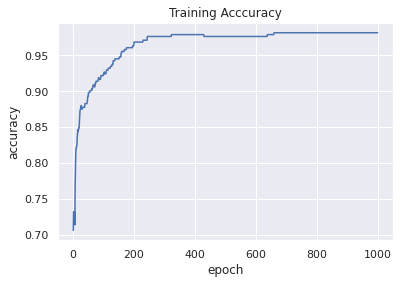

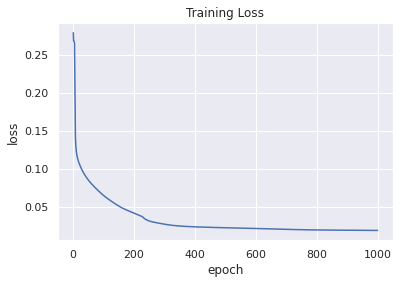

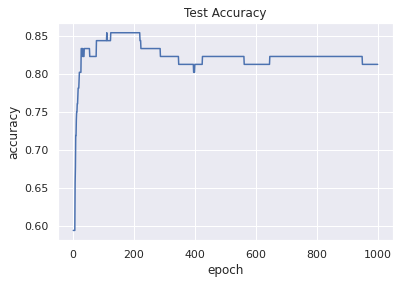

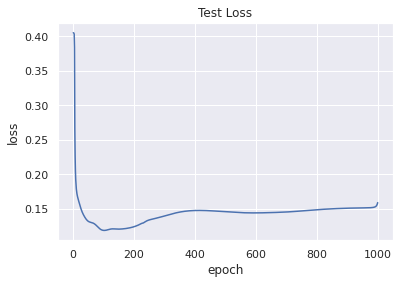

In [ ]:
dnn = Neural_Network(sizes=[X_train.shape[1], 64, 1])
dnn.train(X_train, y_train, X_val, y_val)